# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
import pylab as plt
import seaborn as sns

#%pip install scikit-learn=='1.1.3

In [2]:
#%pip install scikit-learn==1.1.3

## Regression Model Evaluation

In [9]:
from sklearn.datasets import fetch_california_housing

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
data['CHAS'].unique()

array([0., 1.])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [20]:
data.shape

(506, 13)

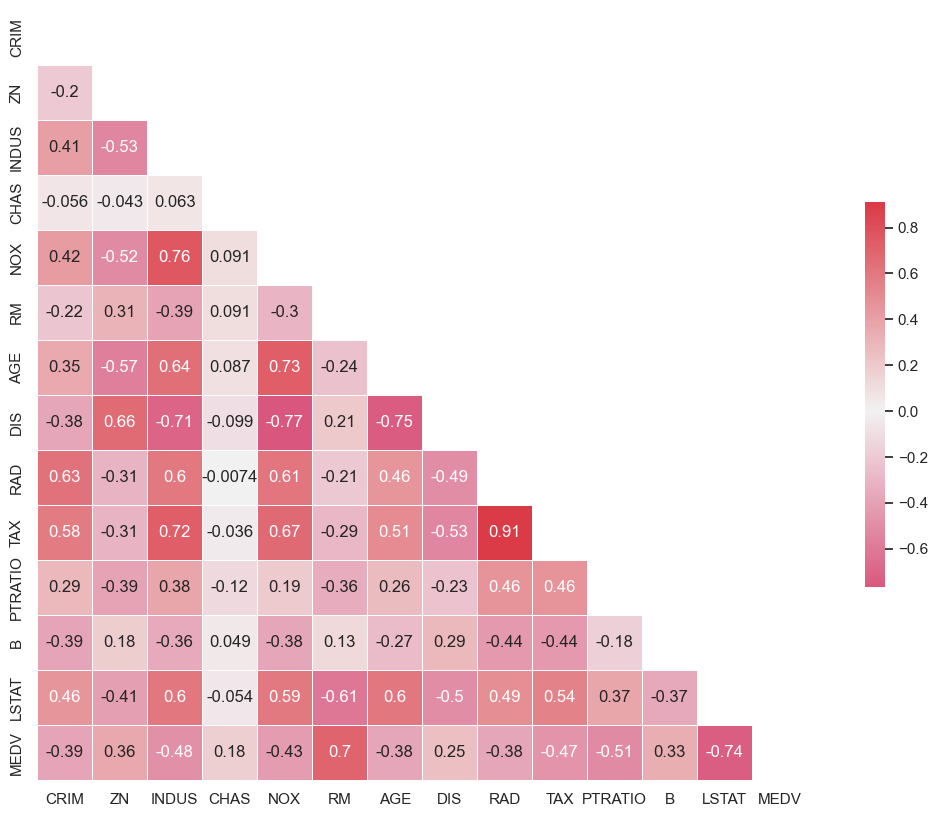

In [12]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(data.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(data.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});


In [13]:
data = data.drop('RAD', axis=1)

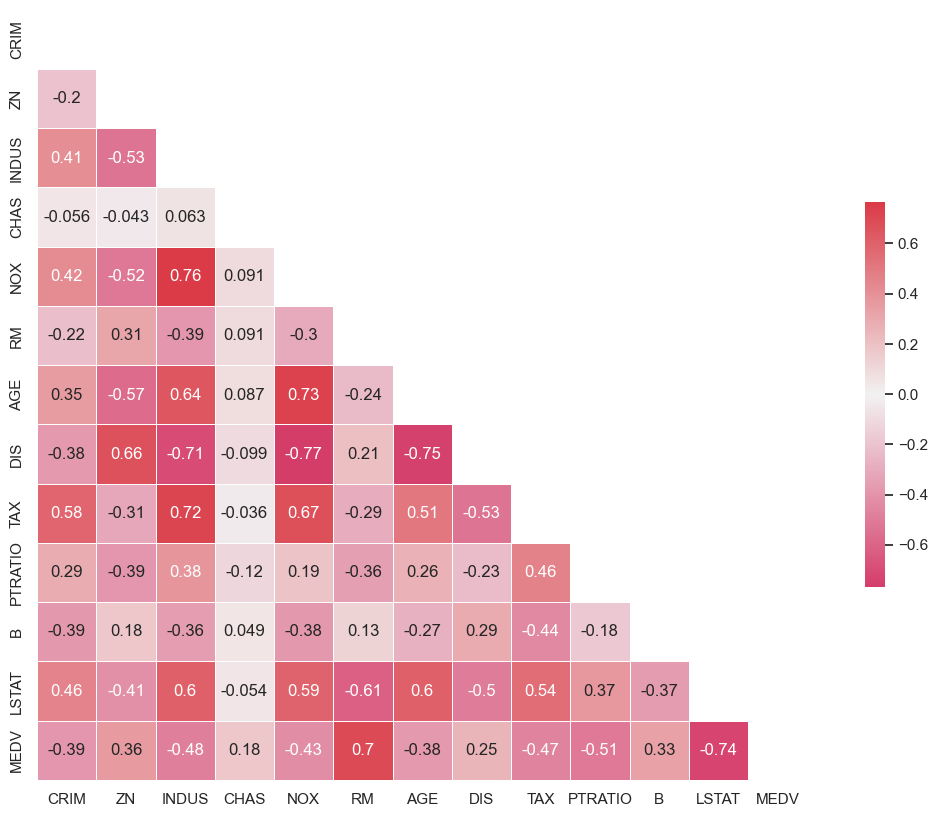

In [14]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(data.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(data.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5}); 

#Comprobamos que hemos elimnado el 0.8 de correlacion tras elimnar RAD

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [17]:
X = data.drop('MEDV', axis=1)

y = data.MEDV

In [22]:
data.shape

(506, 13)

In [18]:
from sklearn.model_selection import train_test_split as tts   


X_train, X_test, y_train, y_test = tts(X, y,
                                       train_size=0.8,
                                       test_size=0.2,
                                       random_state=42
                                      )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 12), (102, 12), (404,), (102,))

In [19]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,307.0,21.0,390.95,11.28


In [ ]:
x

In [23]:
# normalizacion, Normal(0, 1)

from sklearn.preprocessing import StandardScaler

 se está utilizando el escalado estándar para estandarizar las características seleccionadas antes de utilizarlas en un algoritmo de aprendizaje automático. Esto asegura que todas las características tengan una distribución similar y estén en la misma escala, lo que puede ayudar a mejorar la precisión del modelo y evitar sesgos hacia características con escalas más grandes.

In [37]:
scaler = StandardScaler()

scaler.fit_transform(X_train[['CRIM', 'ZN', 'INDUS', 'NOX','RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']])[:5]

array([[ 1.28770177, -0.50032012,  1.03323679,  0.48925206, -1.42806858,
         1.02801516, -0.80217296,  1.57843444,  0.84534281, -0.07433689,
         1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, -0.15723342, -0.68008655,
        -0.43119908,  0.32434893, -0.58464788,  1.20474139,  0.4301838 ,
        -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, -1.00872286, -0.40206304,
        -1.6185989 ,  1.3306972 , -0.60272378, -0.63717631,  0.06529747,
        -0.65159505],
       [ 0.38822983, -0.50032012,  1.03323679,  0.48925206, -0.30045039,
         0.59168149, -0.8392398 ,  1.57843444,  0.84534281, -3.86819251,
         1.52538664],
       [-0.32528234, -0.50032012, -0.41315956, -0.15723342, -0.83109424,
         0.03374663, -0.00549428, -0.58464788,  1.20474139,  0.3791194 ,
        -0.16578736]])

In [38]:
scaler.transform(X_test[['CRIM', 'ZN', 'INDUS', 'NOX','RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']])[:5]

array([[-0.39680933, -0.50032012, -1.00711147, -0.39541229,  0.14128239,
         0.55591643, -0.54585271, -0.65092617, -0.77195078,  0.42887165,
        -0.48121032],
       [-0.40079621,  1.2294987 , -0.66439105, -0.93131473,  0.62394249,
        -1.27525438,  0.12656515, -0.90398873, -0.32270256,  0.44418004,
        -1.25709448],
       [-0.39523443, -0.50032012,  2.43316256,  0.44672012, -0.46980481,
         1.08166274, -0.91144732,  1.8495729 ,  0.80041799,  0.36993437,
         0.79033849],
       [-0.39682512, -0.50032012, -0.02542078, -1.22053192, -0.35407929,
        -2.17295725,  0.69487639, -0.59669848,  0.39609459,  0.37868201,
        -0.97687498],
       [ 0.16708417, -0.50032012,  1.03323679,  1.33138447, -0.02666075,
         0.83130735, -0.67650275,  1.57843444,  0.84534281,  0.31504286,
         0.67768743]])

La razón detrás de esto es que, para un escalador como StandardScaler, se necesita ajustar el escalador a los datos de entrenamiento antes de aplicar cualquier tipo de transformación a los datos. Por lo tanto, en tus datos de entrenamiento (X_train), utilizaste el método fit_transform(), que ajusta el escalador utilizando los valores estadísticos del conjunto de entrenamiento y después transforma los datos.

Luego, cuando tienes nuevos datos de prueba (X_test), quieres asegurarte de que las transformaciones se apliquen de acuerdo con los valores estadísticos aprendidos del conjunto de entrenamiento. Es por eso que utilizas solo el método transform() en los datos de prueba, sin la necesidad de volver a ajustar el escalador.

En resumen, el método fit_transform() se utiliza en el conjunto de entrenamiento para ajustar y transformar los datos, mientras que el método transform() se utiliza en el conjunto de prueba para aplicar las transformaciones aprendidas previamente sin realizar el ajuste nuevamente.

In [40]:
X_train[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT']] = scaler.fit_transform(X_train[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT']])

X_test[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT']] = scaler.transform(X_test[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT']])


X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
477,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.578434,0.845343,-0.074337,1.753505
15,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.584648,1.204741,0.430184,-0.561474
332,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.602724,-0.637176,0.065297,-0.651595
423,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.578434,0.845343,-3.868193,1.525387
19,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.584648,1.204741,0.379119,-0.165787


In [39]:
X_train.head() # 'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,307.0,21.0,390.95,11.28


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [44]:
from sklearn.linear_model import LinearRegression as LinReg   # alias es mio


# se inician los modelos

linreg=LinReg()


In [45]:
linreg.fit(X_train, y_train) 

LinearRegression()

In [46]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
173,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.650926,-0.771951,0.428872,-0.481210
274,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.903989,-0.322703,0.444180,-1.257094
491,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,1.849573,0.800418,0.369934,0.790338
72,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.596698,0.396095,0.378682,-0.976875
452,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.578434,0.845343,0.315043,0.677687


In [47]:
linreg.predict(X_test)[:10]

array([28.86261932, 35.78319643, 18.89119224, 25.15382177, 18.06409623,
       23.97887092, 17.80262631, 15.83970307, 21.91286145, 21.37745411])

In [48]:
y_pred=linreg.predict(X_test)

y_pred[:10]

array([28.86261932, 35.78319643, 18.89119224, 25.15382177, 18.06409623,
       23.97887092, 17.80262631, 15.83970307, 21.91286145, 21.37745411])

Después de hacer predicciones utilizando el modelo de regresión lineal en los datos de prueba, el siguiente paso común es evaluar el rendimiento del modelo utilizando métricas de evaluación. Estas métricas te proporcionan una medida cuantitativa de qué tan bien se está desempeñando el modelo en términos de su capacidad para hacer predicciones precisas.

Aquí hay algunos ejemplos de métricas de evaluación comunes para problemas de regresión:

Mean Squared Error (MSE): Mide el promedio de los errores al cuadrado entre las predicciones del modelo y los valores objetivo reales. Se calcula sumando los errores al cuadrado y dividiéndolo por el número de muestras.

Root Mean Squared Error (RMSE): Es la raíz cuadrada del MSE y proporciona una medida de la desviación estándar de los errores del modelo. Es una medida más interpretable que el MSE, ya que está en la misma escala que la variable objetivo original.

R-squared (R2 Score): Proporciona una medida de qué tan bien se ajusta el modelo a los datos en comparación con un modelo de línea recta simple (baseline). R2 Score varía entre 0 y 1, donde 1 indica un ajuste perfecto y 0 indica que el modelo no es mejor que el modelo de línea recta.

## 3. Calculate and print R-squared for both the training and the testing set.

In [50]:
from sklearn.metrics import r2_score

# Calcula el R-cuadrado para el conjunto de entrenamiento
y_train_pred = linreg.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R-cuadrado para el conjunto de entrenamiento:", r2_train)

# Calcula el R-cuadrado para el conjunto de prueba
y_test_pred = linreg.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R-cuadrado para el conjunto de prueba:", r2_test)

R-cuadrado para el conjunto de entrenamiento: 0.7432668146680894
R-cuadrado para el conjunto de prueba: 0.6390347738951406


El valor del R-cuadrado para el conjunto de entrenamiento es de aproximadamente 0.74, mientras que el valor del R-cuadrado para el conjunto de prueba es de aproximadamente 0.64.

Estos valores indican que tu modelo de regresión lineal tiene un buen ajuste a los datos de entrenamiento y es capaz de explicar alrededor del 74% de la variabilidad en la variable objetivo para el conjunto de entrenamiento. Para el conjunto de prueba, tu modelo es capaz de explicar aproximadamente el 64% de la variabilidad en la variable objetivo.

Recuerda que el R-cuadrado varía entre 0 y 1, donde 1 indica un ajuste perfecto del modelo a los datos y 0 indica que el modelo no es mejor que un modelo de línea recta simple.

Es importante tener en cuenta que estos valores son específicos para tu modelo y tus datos. Siempre es recomendable evaluar el rendimiento del modelo utilizando múltiples métricas y considerar otras consideraciones antes de llegar a conclusiones finales.



## 4. Calculate and print mean squared error for both the training and the testing set.

In [51]:
from sklearn.metrics import mean_squared_error

# Calcula el MSE para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
print("Error medio cuadrático para el conjunto de entrenamiento:", mse_train)

# Calcula el MSE para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
print("Error medio cuadrático para el conjunto de prueba:", mse_test)

Error medio cuadrático para el conjunto de entrenamiento: 22.303285686660598
Error medio cuadrático para el conjunto de prueba: 26.470945619590704


El valor del MSE para el conjunto de entrenamiento es aproximadamente 22.30, mientras que el valor del MSE para el conjunto de prueba es aproximadamente 26.47.

Esto significa que, en promedio, las predicciones de tu modelo difieren de los verdaderos valores objetivo en aproximadamente 22.30 (para el conjunto de entrenamiento) y 26.47 (para el conjunto de prueba), al cuadrado. Cuanto menor sea el valor del MSE, mejor será el rendimiento del modelo, ya que indica que hay menos discrepancia entre las predicciones y los valores reales.

Recuerda que el MSE mide la calidad del ajuste del modelo en términos de sus predicciones. Aunque es una medida útil, es importante evaluar el rendimiento del modelo utilizando múltiples métricas y considerar otras consideraciones antes de llegar a conclusiones finales.

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [52]:
from sklearn.metrics import mean_absolute_error

# Calcular el MAE para el conjunto de entrenamiento

mae_train = mean_absolute_error(y_train, y_train_pred)
print("Error absoluto medio para el conjunto de entrenamiento:", mae_train)

# Calcular el MAE para el conjunto de pruebas

mae_test = mean_absolute_error(y_test, y_test_pred)
print("Error absoluto medio para el conjunto de pruebas:", mae_test)

Error absoluto medio para el conjunto de entrenamiento: 3.3114335859958564
Error absoluto medio para el conjunto de pruebas: 3.3559070103375856


El valor del MAE para el conjunto de entrenamiento es aproximadamente 3.31, mientras que el valor del MAE para el conjunto de pruebas es aproximadamente 3.36.

Esto significa que, en promedio, las predicciones de tu modelo difieren de los verdaderos valores objetivo en aproximadamente 3.31 (para el conjunto de entrenamiento) y 3.36 (para el conjunto de pruebas). El MAE te proporciona una medida de la magnitud promedio de los errores absolutos.

Un MAE bajo indica que el modelo tiene un buen rendimiento en términos de la precisión de las predicciones. Sin embargo, es importante tener en cuenta que el MAE es sensible a los valores atípicos en los datos, por lo que se deben considerar otras métricas y consideraciones al evaluar el rendimiento del modelo.

## Classification Model Evaluation

In [18]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [19]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


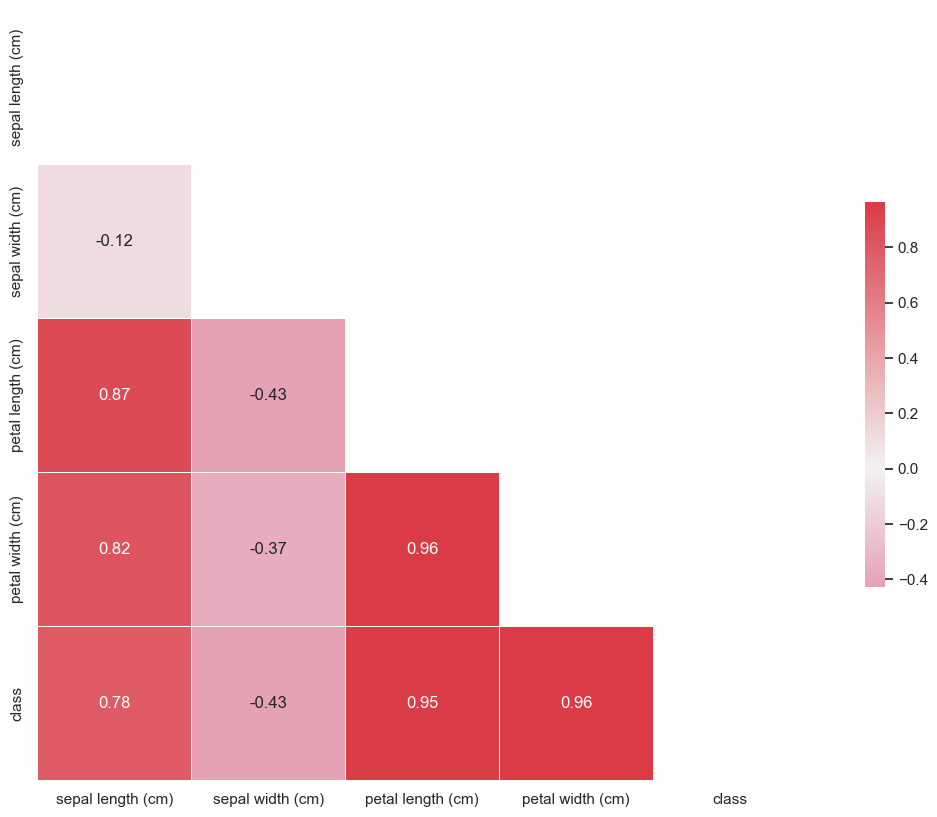

In [20]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(data.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(data.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [24]:
data = data.drop('petal length (cm)', axis=1)

In [29]:
data = data.drop('petal width (cm)', axis=1)

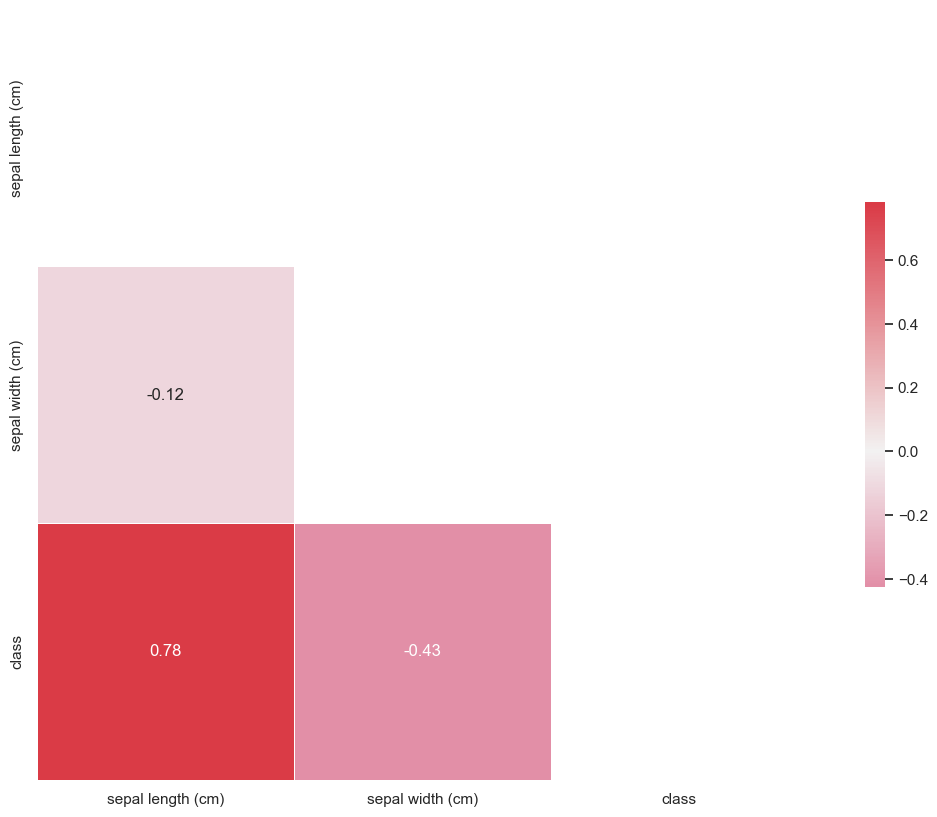

In [30]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(data.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(data.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [31]:
X = data.drop('class', axis=1)

y = data['class']

In [32]:
from sklearn.model_selection import train_test_split as tts   


X_train, X_test, y_train, y_test = tts(X, y,
                                       train_size=0.8,
                                       test_size=0.2,
                                       random_state=42
                                      )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 2), (30, 2), (120,), (30,))

In [33]:
# normalizacion, Normal(0, 1)

from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler() 

scaler.fit_transform(X_train[['sepal length (cm)', 'sepal width (cm)']])[:5]

array([[-1.47393679,  1.20365799],
       [-0.13307079,  2.99237573],
       [ 1.08589829,  0.08570939],
       [-1.23014297,  0.75647855],
       [-1.7177306 ,  0.30929911]])

In [14]:
scaler = StandardScaler() 

scaler.fit_transform(X_test[['sepal length (cm)', 'sepal width (cm)']])[:5]

array([[ 0.14443512, -0.63451517,  0.45110832, -0.07943674],
       [-0.33701527,  2.00929805, -1.2060243 , -1.20827465],
       [ 2.07023667, -1.16327782,  1.66633891,  1.30025404],
       [ 0.02407252, -0.37013385,  0.34063282,  0.29684256],
       [ 0.98697329, -0.63451517,  0.50634608,  0.17141613]])

In [37]:
X_train[['sepal length (cm)', 'sepal width (cm)']] = scaler.fit_transform(X_train[['sepal length (cm)', 'sepal width (cm)']])

X_test[['sepal length (cm)', 'sepal width (cm)']] = scaler.transform(X_test[['sepal length (cm)', 'sepal width (cm)']])


X_train.head()

,sepal length (cm),sepal width (cm)
22,-1.473937,1.203658
15,-0.133071,2.992376
65,1.085898,0.085709
11,-1.230143,0.756479
42,-1.717731,0.309299


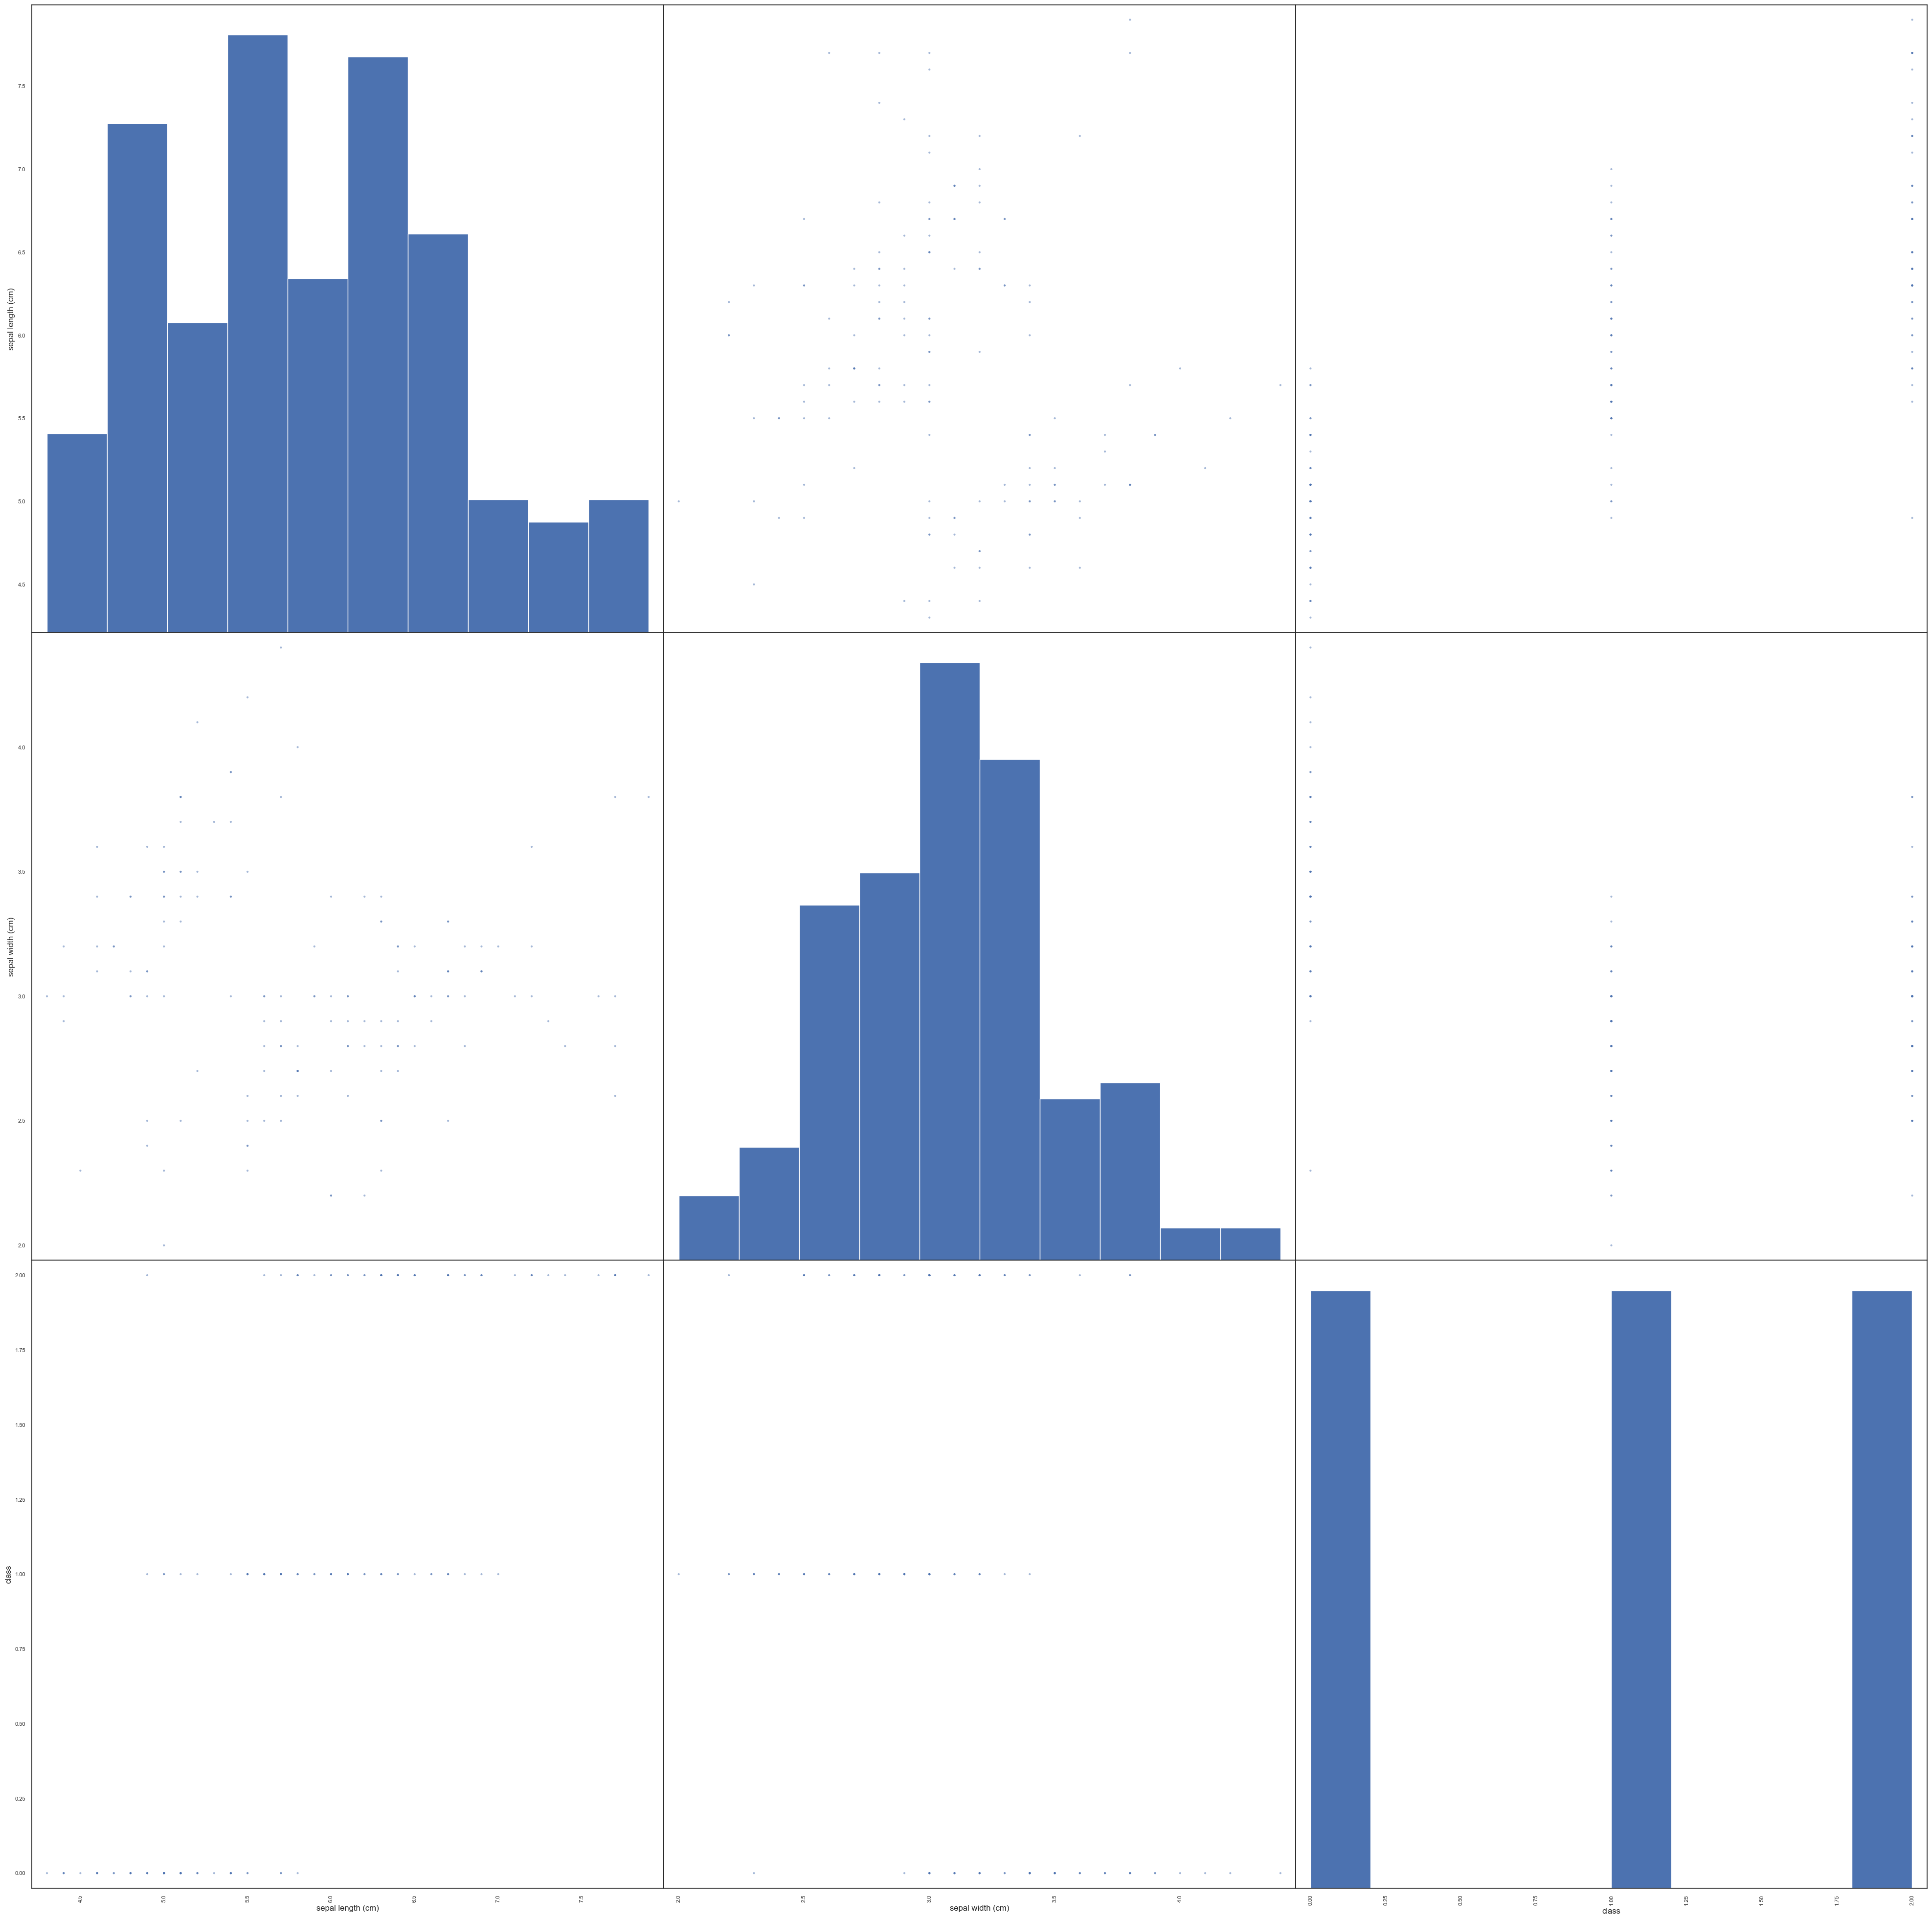

In [39]:
pd.plotting.scatter_matrix(data, figsize=(50, 50), alpha=0.5);

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   class              150 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.6 KB


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [41]:
from sklearn.linear_model import LogisticRegression 

logreg=LogisticRegression(max_iter=2000)

In [42]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [43]:
y_pred=logreg.predict(X_test)

y_pred[:10]

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1])

In [44]:
y_prob=logreg.predict_proba(X_test)

y_prob[:10]

array([[9.66604541e-03, 5.51861893e-01, 4.38472061e-01],
       [8.67980516e-01, 6.84498678e-02, 6.35696160e-02],
       [2.38827525e-06, 1.52595963e-01, 8.47401648e-01],
       [2.36911839e-02, 5.59014100e-01, 4.17294716e-01],
       [4.25865326e-04, 3.36160612e-01, 6.63413523e-01],
       [7.75604723e-01, 1.51632544e-01, 7.27627327e-02],
       [1.16345526e-01, 6.12013684e-01, 2.71640790e-01],
       [1.06497117e-03, 2.66195200e-01, 7.32739829e-01],
       [3.55301071e-04, 6.23549393e-01, 3.76095306e-01],
       [2.11497539e-02, 6.51340250e-01, 3.27509996e-01]])

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
y_pred=logreg.predict(X_test)

y_pred[:10]

In [55]:
# conjunto de entrenamiento
y_train_pred = logreg.predict(X_train)
puntaje_entrenamiento = accuracy_score(y_train, y_train_pred)
print("Puntaje de precisión para el conjunto de entrenamiento:", puntaje_entrenamiento)

#  conjunto de pruebas
y_test_pred = logreg.predict(X_test)
puntaje_pruebas = accuracy_score(y_test, y_test_pred)
print("Puntaje de precisión para el conjunto de pruebas:", puntaje_pruebas)

Puntaje de precisión para el conjunto de entrenamiento: 0.7916666666666666
Puntaje de precisión para el conjunto de pruebas: 0.9


In [56]:
f1 = f1_score(y_test, y_test_pred, average='micro')
print("Valor de F1:", f1)

Valor de F1: 0.9


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [58]:
from sklearn.metrics import balanced_accuracy_score

#  conjunto de entrenamiento
balanced_accuracy_train = balanced_accuracy_score(y_train, y_train_pred)
print("Puntaje de precisión balanceada para el conjunto de entrenamiento:", balanced_accuracy_train)

# conjunto de pruebas
balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)
print("Puntaje de precisión balanceada para el conjunto de pruebas:", balanced_accuracy_test)

Puntaje de precisión balanceada para el conjunto de entrenamiento: 0.7911246612466124
Puntaje de precisión balanceada para el conjunto de pruebas: 0.8956228956228957


El puntaje de precisión balanceada proporciona una medida del rendimiento del modelo que tiene en cuenta los desequilibrios en las clases. Es útil cuando tus datos tienen clases desiguales y quieres evaluar el modelo de manera más equitativa.

Un puntaje de precisión balanceada de 0.7911246612466124 para el conjunto de entrenamiento significa que el modelo logra un buen equilibrio al realizar predicciones precisas para todas las clases presentes en los datos de entrenamiento. Este puntaje tiene en cuenta los desequilibrios entre las clases y es una medida más equitativa del rendimiento del modelo.

Por otro lado, un puntaje de precisión balanceada de 0.8956228956228957 para el conjunto de pruebas indica que el modelo también mantiene un buen equilibrio en las predicciones sobre las clases en los datos de prueba, logrando una precisión balanceada.

Estos puntajes sugieren que el modelo es capaz de realizar predicciones precisas y balanceadas en ambos conjuntos de datos.

Recuerda que el puntaje de precisión balanceada es una métrica útil cuando tienes clases desiguales en tus datos y deseas evaluar el rendimiento del modelo de manera equitativa.

## 10. Calculate and print the precision score for both the training and the testing set.

In [60]:
from sklearn.metrics import precision_score

# conjunto de entrenamiento
precision_train = precision_score(y_train, y_train_pred, average='micro')
print("Puntaje de precisión para el conjunto de entrenamiento:", precision_train)

#  conjunto de pruebas
precision_test = precision_score(y_test, y_test_pred, average='micro')
print("Puntaje de precisión para el conjunto de pruebas:", precision_test)

Puntaje de precisión para el conjunto de entrenamiento: 0.7916666666666666
Puntaje de precisión para el conjunto de pruebas: 0.9


el puntaje de precisión representa la proporción de predicciones correctas respecto al número total de predicciones y es una métrica importante para evaluar el rendimiento de un modelo en la clasificación de problemas multiclase.

## 11. Calculate and print the recall score for both the training and the testing set.

In [62]:
from sklearn.metrics import recall_score

# conjunto de entrenamiento
recall_train = recall_score(y_train, y_train_pred, average='micro')
print("Puntaje de recall para el conjunto de entrenamiento:", recall_train)

# conjunto de pruebas
recall_test = recall_score(y_test, y_test_pred, average='micro')
print("Puntaje de recall para el conjunto de pruebas:", recall_test)

Puntaje de recall para el conjunto de entrenamiento: 0.7916666666666666
Puntaje de recall para el conjunto de pruebas: 0.9


El puntaje de recall de 0.7916666666666666 para el conjunto de entrenamiento significa que aproximadamente el 79.17% de las muestras positivas presentes en el conjunto de entrenamiento fueron detectadas correctamente por el modelo. Esto indica un buen desempeño en la capacidad del modelo para identificar las muestras positivas en el conjunto de entrenamiento.

Por otro lado, el puntaje de recall de 0.9 para el conjunto de pruebas indica que aproximadamente el 90% de las muestras positivas en el conjunto de pruebas fueron detectadas correctamente por el modelo. Esto sugiere que el modelo también tiene un buen rendimiento en la clasificación de nuevas muestras no vistas durante el entrenamiento.

Tanto el puntaje de recall para el conjunto de entrenamiento como para el conjunto de pruebas son altos, lo cual es prometedor. Sin embargo, siempre es recomendable considerar otras métricas y realizar una evaluación más completa del modelo antes de tomar conclusiones finales.

Recuerda que el puntaje de recall representa la proporción de muestras positivas detectadas correctamente en relación con el número total de muestras positivas presentes en el conjunto de datos. Es una métrica importante para evaluar la capacidad del modelo para identificar correctamente los casos positivos.

## 12. Calculate and print the F1 score for both the training and the testing set.

In [64]:
from sklearn.metrics import f1_score

# conjunto de entrenamiento
f1_train = f1_score(y_train, y_train_pred, average='micro')
print("Puntaje F1 para el conjunto de entrenamiento:", f1_train)

# conjunto de pruebas
f1_test = f1_score(y_test, y_test_pred, average='micro')
print("Puntaje F1 para el conjunto de pruebas:", f1_test)

Puntaje F1 para el conjunto de entrenamiento: 0.7916666666666666
Puntaje F1 para el conjunto de pruebas: 0.9


El puntaje F1 de 0.7916666666666666 para el conjunto de entrenamiento indica que el modelo tiene un buen equilibrio entre precisión y recall en la clasificación de las muestras positivas en el conjunto de entrenamiento. Esto significa que el modelo logra un buen balance entre la capacidad de identificar correctamente las muestras positivas y la minimización de los falsos positivos.

Por otro lado, el puntaje F1 de 0.9 para el conjunto de pruebas también muestra un buen rendimiento del modelo en la clasificación de nuevas muestras no vistas durante el entrenamiento. Este puntaje F1 cercano a 1 indica que el modelo logra una alta precisión y recall en la clasificación de las muestras positivas en el conjunto de pruebas.

El puntaje F1 es una métrica que combina la precisión y el recall en un solo valor, por lo que un mayor puntaje F1 indica un mejor rendimiento del modelo en la clasificación de las muestras positivas.

Recuerda que el puntaje F1 es especialmente útil cuando hay un desequilibrio en el número de clases o cuando el costo de los falsos positivos y los falsos negativos son similares.

La elección entre average='micro' y average='macro' depende del contexto de tus datos y del objetivo de tu tarea de clasificación. Si todas las clases son igualmente importantes y deseas tener un equilibrio general entre todas ellas, puedes utilizar average='micro'. Por otro lado, si algunas clases son más importantes que otras o si deseas evaluar el rendimiento de cada clase por separado, puedes utilizar average='macro'.

Objetivo de tu clasificador: Si tu objetivo principal es tener un equilibrio general entre todas las clases y evaluar el rendimiento del clasificador en términos de precisión general, sensibilidad y recuperación, average='micro' puede ser más apropiado. Proporciona una visión global de cómo el clasificador está realizando la tarea de clasificación en general.

Evaluación de cada clase por separado: Si deseas evaluar el rendimiento de cada clase de forma individual, especialmente si algunas clases son más críticas o importantes, average='macro' es más adecuado. Te permitirá ver el desempeño de cada clase de manera independiente.

## 13. Generate confusion matrices for both the training and the testing set.

In [67]:
# conjunto de entrenamiento
confusion_train = confusion_matrix(y_train, y_train_pred)
print("Matriz de confusión para el conjunto de entrenamiento:")
print(confusion_train)


Matriz de confusión para el conjunto de entrenamiento:
[[39  1  0]
 [ 0 30 11]
 [ 0 13 26]]


La diagonal principal de la matriz indica los aciertos de clasificación para cada clase. Por ejemplo, en la clase 0, hay 39 aciertos, en la clase 1 hay 30 aciertos y en la clase 2 hay 26 aciertos.

Los valores fuera de la diagonal principal representan los errores de clasificación. Por ejemplo, en la clase 1 se han clasificado incorrectamente 11 instancias como pertenecientes a la clase 2, y en la clase 2 se han clasificado incorrectamente 13 instancias como pertenecientes a la clase 1.

In [66]:
# conjunto de pruebas
confusion_test = confusion_matrix(y_test, y_test_pred)
print("Matriz de confusión para el conjunto de pruebas:")
print(confusion_test)

Matriz de confusión para el conjunto de pruebas:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


La diagonal principal de la matriz indica los aciertos de clasificación para cada clase. Por ejemplo, en la clase 0, hay 10 aciertos, en la clase 1 hay 7 aciertos y en la clase 2 hay 10 aciertos.

Los valores fuera de la diagonal principal representan los errores de clasificación. Por ejemplo, en la clase 1 se han clasificado incorrectamente 2 instancias como pertenecientes a la clase 2, y en la clase 2 se ha clasificado incorrectamente 1 instancia como perteneciente a la clase 1.

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [75]:
from sklearn.metrics import confusion_matrix as cm

In [76]:
cm(y_test, y_test_pred)

array([[10,  0,  0],
       [ 0,  7,  2],
       [ 0,  1, 10]])

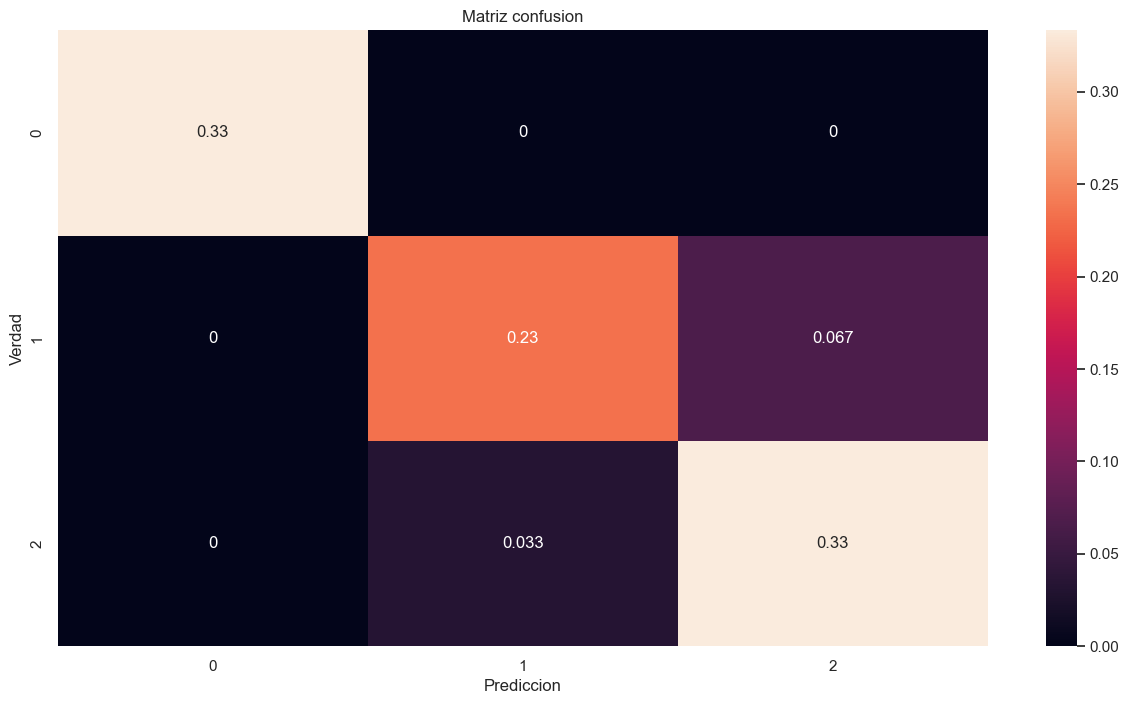

In [77]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_test_pred)/cm(y_test,y_test_pred).sum(), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [78]:
from sklearn.ensemble import RandomForestClassifier as RFC


rfc = RFC()

rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)


y_pred_rfc[:4]

array([1, 0, 2, 1])

In [88]:
# conjunto de entrenamiento

y_train_pred = rfc.predict(X_train)
puntaje_entrenamiento = accuracy_score(y_train, y_train_pred)
print("Puntaje de precisión para el conjunto de entrenamiento:", puntaje_entrenamiento)

# conjunto de pruebas

y_test_pred = rfc.predict(X_test)
puntaje_pruebas = accuracy_score(y_test, y_test_pred)
print("Puntaje de precisión para el conjunto de pruebas:", puntaje_pruebas)

Puntaje de precisión para el conjunto de entrenamiento: 0.9416666666666667
Puntaje de precisión para el conjunto de pruebas: 0.8


In [89]:
# conjunto de entrenamiento

balanced_accuracy_train = balanced_accuracy_score(y_train, y_train_pred)
print("Puntaje de precisión balanceada para el conjunto de entrenamiento:", balanced_accuracy_train)

# conjunto de pruebas

balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)
print("Puntaje de precisión balanceada para el conjunto de pruebas:", balanced_accuracy_test)

Puntaje de precisión balanceada para el conjunto de entrenamiento: 0.9410047946633312
Puntaje de precisión balanceada para el conjunto de pruebas: 0.7979797979797979


In [90]:
# conjunto de entrenamiento

precision_train = precision_score(y_train, y_train_pred, average='micro')
print("Puntaje de precisión para el conjunto de entrenamiento:", precision_train)

# conjunto de pruebas

precision_test = precision_score(y_test, y_test_pred, average='micro')
print("Puntaje de precisión para el conjunto de pruebas:", precision_test)

Puntaje de precisión para el conjunto de entrenamiento: 0.9416666666666667
Puntaje de precisión para el conjunto de pruebas: 0.8


In [91]:
# conjunto de entrenamiento

recall_train = recall_score(y_train, y_train_pred, average='micro')
print("Puntaje de recall para el conjunto de entrenamiento:", recall_train)

# conjunto de pruebas

recall_test = recall_score(y_test, y_test_pred, average='micro')
print("Puntaje de recall para el conjunto de pruebas:", recall_test)

Puntaje de recall para el conjunto de entrenamiento: 0.9416666666666667
Puntaje de recall para el conjunto de pruebas: 0.8


In [92]:
#  conjunto de entrenamiento

f1_train = f1_score(y_train, y_train_pred, average='micro')
print("Puntaje F1 para el conjunto de entrenamiento:", f1_train)

# conjunto de pruebas

f1_test = f1_score(y_test, y_test_pred, average='micro')
print("Puntaje F1 para el conjunto de pruebas:", f1_test)

Puntaje F1 para el conjunto de entrenamiento: 0.9416666666666667
Puntaje F1 para el conjunto de pruebas: 0.8000000000000002
